In [38]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
#import constants as pc

'''
IDEAS FOR CODING:

evolve_both_stars
    Tests MESA evolving two stars simultaneously including mass transfer.
1.3M_ms_
1.4M_ms_
1.5M_ms_

# may be useful for a model maybe
accreted_material_j
    This test suite example checks the accretion of material and angular momentum onto a 20 
    model.
    
# changing the inlist may make this useful
conserve_angular_momentum
    This test suite example checks angular momentum conservation from the zero age main-sequence to the formation of a helium core in 1.0 
    Z=0.02 metallicity, model.
    
# not too sure what this is but may be cool
custom_colors
    This test suite example shows how to use user-defined color filter and extinction files.

# testing
cd star/test_suite/high_mass
./mk
./rn


INSTRUCTIONS:

- to see the list for evolve both stars
    ls /opt/mesa/mesa-r23.05.1/binary/test_suite
- to make the file
    cp -r /opt/mesa/mesa-r23.05.1/binary/test_suite/evolve_both_stars ~/.
    cd evolve_both_stars
- then to look at the file in order to change initial values
    type 'nano inlist_project' to get into file
    
    &binary_job

       inlist_names(1) = 'inlist1' 
       inlist_names(2) = 'inlist2'

       evolve_both_stars = .true.

    !   pgbinary_flag = .true.

    / ! end of binary_job namelist

    &binary_controls
       # ONLY CHANGE THE MASS FOR m1

       m1 = 1.0d0  ! donor mass in Msun
       m2 = 0.8d0 ! companion mass in Msun
       initial_period_in_days = 0.5d0

       fr = 0.01
       fr_limit = 1d-3

       limit_retention_by_mdot_edd = .false.

    / ! end of binary_controls namelist

- and then run the code 
    ./mk
    ./rn

- after the code is finished running for hopefully all 28 profile datas, take all the profiledata nd copy it over to a new file in the 
  evolve_both_stars called something like Mass_1M then run again using mass like m1=1.1d0 and repeat



RANDOM:

look at star tests in MESA website
use hydrocode for supernova or core collapse, MESA uses hydro equil so no core collapse
look at binary tests in MESA website
ls shows menu 
ls /opt/mesa/mesa-r23.05.1/star/test_suite
could also do binary
maybe use mdot
cd 7M_prems......./
./mk make
./rn run
star core temp around 10^7
can look at chemical compositions in center of star
cat inlist gives what some inlists do like (cat shows all text of a file)
cat inlist_7M_..... this is useful for initial mass changes with nano ~/.bashrc
mass and radius in solar units and everything else in cgs units
    how mass accretion affects the heat transfer on heat transfer zones in a star
Sun metalicity near Z = 0.02
Z affects blue or red suprgiants
change profile_interval for when you get profile data files (in terms of steps)
grep 'initial_ass' inlis* used to find where this is mentioned
profilXX.data at a certain point in time, full star info
history.data time series information about the entire calculation (useful for plotting something against time)
ms.bulk_names useful to see all variable names can google mesa and variable name for documentation
could also plot triple alpha energy generation rate (along with pp cno)
git clone 



MAY BE USEFUL:

NEED MODEL NEAR END TO TEST RESULTS, MOST LIKELY HYDROSTATIC EQUILIBRIUM OR VIRIAL THEOREM
evolve_both_stars
Tests MESA evolving two stars simultaneously including mass transfer.
star_plus_point_mass
Tests MESA evolving one star plus a point mass, including mass transfer to the point mass.
star_plus_point_mass_explicit_mdot
Same as above, but run using an explicit calculation for the mass transfer rate

INFORMATION:

*****************
evolve_both_stars
*****************

This test case checks the evolution of two stars simultaneously including mass transfer.

This test case has 1 part. Click to see a larger version of a plot.

* Part 1 (``inlist_project``) loads a 1 Msun and a 0.8 Msun zero-age main sequence models. The binary system has an initial period of
0.5 day, and is evolved until the Roche Lobe overflow indicator (R - Rlobe)/Rlobe  is greater than the default 0.0 value of 
``accretor_overflow_terminate``:

mixing regions
      
      mass_conv_core ! (Msun) mass coord of top of convective core.  0 if core is not convective
      
      
      !  mx1 refers to the largest (by mass) convective region.
      !  mx2 is the 2nd largest.

      !  conv_mx1_top and conv_mx1_bot are the region where mixing_type == convective_mixing.
      !  mx1_top and mx1_bot are the extent of all kinds of mixing, convective and other.
      
      ! values are m/Mstar
      conv_mx1_top
      conv_mx1_bot
      conv_mx2_top
      conv_mx2_bot
      mx1_top
      mx1_bot
      mx2_top
      mx2_bot
      
      ! radius -- values are radii in Rsun units
      !conv_mx1_top_r
      !conv_mx1_bot_r
      !conv_mx2_top_r
      !conv_mx2_bot_r
      !mx1_top_r
      !mx1_bot_r
      !mx2_top_r
      !mx2_bot_r
'''

"\nIDEAS FOR CODING:\n\nevolve_both_stars\n    Tests MESA evolving two stars simultaneously including mass transfer.\n1.3M_ms_\n1.4M_ms_\n1.5M_ms_\n\n# may be useful for a model maybe\naccreted_material_j\n    This test suite example checks the accretion of material and angular momentum onto a 20 \n    model.\n    \n# changing the inlist may make this useful\nconserve_angular_momentum\uf0c1\n    This test suite example checks angular momentum conservation from the zero age main-sequence to the formation of a helium core in 1.0 \n    Z=0.02 metallicity, model.\n    \n# not too sure what this is but may be cool\ncustom_colors\n    This test suite example shows how to use user-defined color filter and extinction files.\n\n# testing\ncd star/test_suite/high_mass\n./mk\n./rn\n\n\nINSTRUCTIONS:\n\n- to see the list for evolve both stars\n    ls /opt/mesa/mesa-r23.05.1/binary/test_suite\n- to make the file\n    cp -r /opt/mesa/mesa-r23.05.1/binary/test_suite/evolve_both_stars ~/.\n    cd evol

In [39]:
# This example is for using the py_mesa_reader package
import sys
sys.path.append('/home/stdi6279/py_mesa_reader')
import mesa_reader as m

# create path, ms and rg so that I can pull data from the profile.data to plot graphs later on
path = '/home/stdi6279/7M_prems_to_AGB/'
ms = m.MesaData(file_name=path+'LOGS/profile4.data')
rg = m.MesaData(file_name=path+'LOGS/profile6.data')

Text(0, 0.5, 'Density (g $cm^{-3}$)')

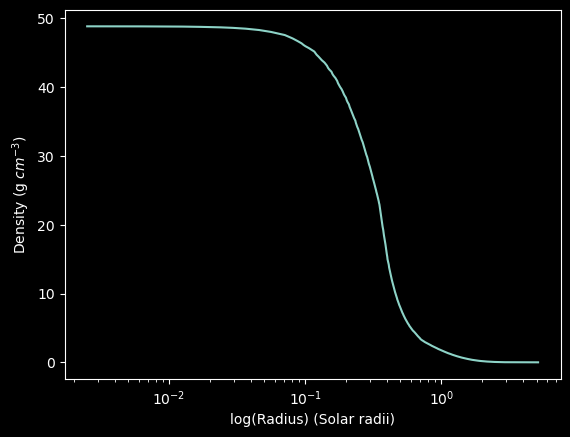

In [40]:
#.....................................................................TEST.....................................................................

# create the plot of density against radius using profile 4 data
plt.semilogx(ms.data('radius'), 10**(ms.data('logRho')))

# assign accurate labels to the axes
plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Density (g $cm^{-3}$)')

4986.06945353158
6794.561480870929
21404.27517212973
4443.249367481949


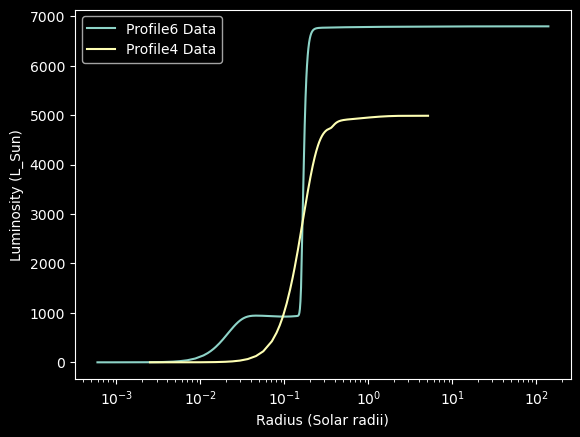

In [41]:
#.....................................................................TEST.....................................................................

# create the plot of luminosity against radius for profile 4 and 6 data
plt.semilogx(rg.data('radius'), (rg.data('luminosity')), label = "Profile6 Data")
plt.semilogx(ms.data('radius'), (ms.data('luminosity')), label = "Profile4 Data")

# assign accurate labels to the axes
plt.xlabel('Radius (Solar radii)'); plt.ylabel('Luminosity (L_Sun)')

# show legend
plt.legend()

print(max(ms.data('luminosity')))
print(max(rg.data('luminosity')))

print(ms.Teff)
print(rg.Teff)

In [42]:
#.....................................................................TEST.....................................................................

# import a code file hydro3.py
import SDhydro3_mesa as hydro3
from astropy.io import ascii

# day 1 problem setup

# define a dictionary of arguments that we will pass to the hydrodynamics code specifying the problem to run
args = {'mname':'lab1/profile3.data','htype':'zero','piston_eexp':5e50,'v_piston':1e9,'piston_stop':10,'r_outer':1e13,'rmin':1e8,'t_stop':1e7,'noplot':1}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

print(h.mname)

ModuleNotFoundError: No module named 'SDhydro3_mesa'

In [8]:
#.....................................................................TEST.....................................................................

# variables stored within our object h are accessed by h.variable_name
# use your past labs and class notebooks, the hydro code notes, and class slides for help!

# by looking at past labs I realized I just need to re-initialize the hydro3_mesa file with the new i and b types 
h.bctype=[h.FALLBACK, h.OUTFLOW]
h.itype=h.MESA

h.setup_initial_conditions()
h.initialize_boundary_conditions()
h.apply_boundary_conditions()

NameError: name 'h' is not defined

In [9]:
#.....................................................................TEST.....................................................................

t_stop = [1e2,3e2,1e3,3e3,1e4,3e4,1e5,3e5,1e6]
# Using this so that the values are not printed out as this makes the HTML file more difficult to navigate
h.print = False

# using the run_checkpoint function in the hydro3_mesa file
new_values = h.run_checkpoint(t_stop)

# create empty lists of correct size so that I can then replace the zeroes in each array with the correct value
min_rad = [0] * len(new_values)
max_rad = [0] * len(new_values)

# same thing as before
m_tot = [0] * len(new_values)
m_inner = [0] * len(new_values)

# for loop using enumeration to plot the graphs
for i, H in enumerate(new_values):
    # create the loglog plot of density against radius for each time in t_stop
    plt.loglog(H.zones.r, H.zones.d, label = f"{t_stop[i]} s")
    
    # replacing the values in the arrays above with the correct values
    min_rad[i] = H.zones.r[0]
    max_rad[i] = H.zones.r[-1]
    
    m_tot[i] = H.zones.mcum[-1]
    m_inner[i] = H.mass_r_inner

# assign accurate labels to the axes
plt.xlabel('log Radius (cm)'); plt.ylabel('log Density (g $cm^{-3}$)')

#create a legend and re-locate it to the right of the graph
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

NameError: name 'h' is not defined

In [10]:
#.....................................................................TEST.....................................................................

# create the loglog plot of pressure against radius for each time in t_stop
for i, H in enumerate(new_values):
    plt.loglog(H.zones.r, H.zones.p, label = f"{t_stop[i]} s")
    
# assign accurate labels to the axes
plt.xlabel('log Radius (cm)'); plt.ylabel('log Pressure (g $cm^{-1}$ $s^{-2}$)')

#create a legend and re-locate it to the right of the graph
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

NameError: name 'new_values' is not defined

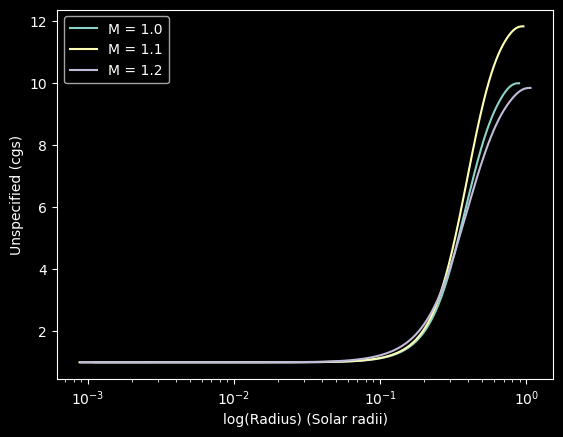

In [26]:
'''
START OF THE PROJECT

using nao inlist_project

&binary_job

   inlist_names(1) = 'inlist1'
   inlist_names(2) = 'inlist2'

   evolve_both_stars = .true.

!   pgbinary_flag = .true.

/ ! end of binary_job namelist

&binary_controls

   m1 = 1.0d0  ! donor mass in Msun
   m2 = 0.8d0 ! companion mass in Msun
   initial_period_in_days = 0.5d0

   fr = 0.01
   fr_limit = 1d-3

   limit_retention_by_mdot_edd = .false.

/ ! end of binary_controls namelist

'''

import sys
sys.path.append('/home/stdi6279/py_mesa_reader')
import mesa_reader as m

# create path, ms and rg so that I can pull data from the profile.data to plot graphs later on
path = '/home/stdi6279/evolve_both_stars/'
a1 = m.MesaData(file_name=path+'Mass_1M/profile15.data')
a2 = m.MesaData(file_name=path+'Mass_1.1M/profile15.data')
a3 = m.MesaData(file_name=path+'LOGS1/profile15.data')
his = m.MesaData(file_name=path+'binary_history.data')

# create the plot of density against radius using profile 4 data
plt.semilogx(a1.data('radius'), 10**(a1.data('mass')), label = 'M = 1.0')
plt.semilogx(a2.data('radius'), 10**(a2.data('mass')), label = 'M = 1.1')
plt.semilogx(a3.data('radius'), 10**(a3.data('mass')), label = 'M = 1.2')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

# plt.xlim(0.6, 1)

# assign accurate labels to the axes
plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Unspecified (cgs)')
plt.legend()

# print(a1.Teff)

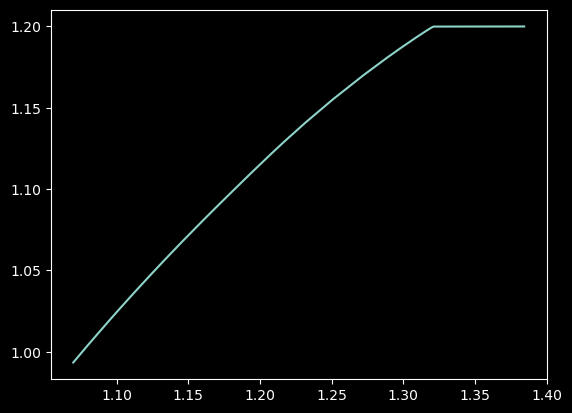

In [27]:
plt.plot(his.data('rl_1'), his.data('star_1_mass'))

In [16]:
# b = m.MesaData(file_name=path+'docs/profile_s1_001314.svg')
# a = m.MesaData(file_name=path+'LOGS1/profile11.data')
# print(b)

# pip install svglib reportlab

from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas
import os

svg_file = "profile_s1_001314.svg"
print(f"Current directory: {os.getcwd()}")
print(f"File exists: {os.path.isfile(svg_file)}")

def print_svg(svg_file, output_pdf):
    drawing = svg2rlg(svg_file)
    if not drawing:
        raise ValueError(f"Failed to load SVG file: {svg_file}")
    c = canvas.Canvas(output_pdf)
    renderPDF.draw(drawing, c, 0, 0)
    c.save()

try:
    print_svg("profile_s1_001314.svg", "output.pdf")
except Exception as e:
    print(f"Error: {e}")

Current directory: /home/stdi6279/astr3400project
File exists: True


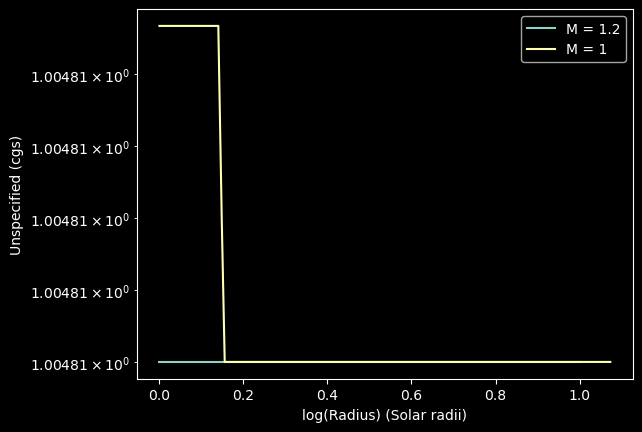

In [17]:
# chemical composition
# h1
# he4
# o16
# mg24
# c12
# ne20
# n14
# he3

# create the plot of density against radius using profile 4 data
plt.semilogy(a1.data('mass'), 10**(a1.data('ne20')), label = 'M = 1.2')
plt.semilogy(a2.data('mass'), 10**(a2.data('ne20')), label = 'M = 1')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

# plt.xlim(0.6, 1)

# assign accurate labels to the axes
plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Unspecified (cgs)')
plt.legend()

# print(a1.Teff)


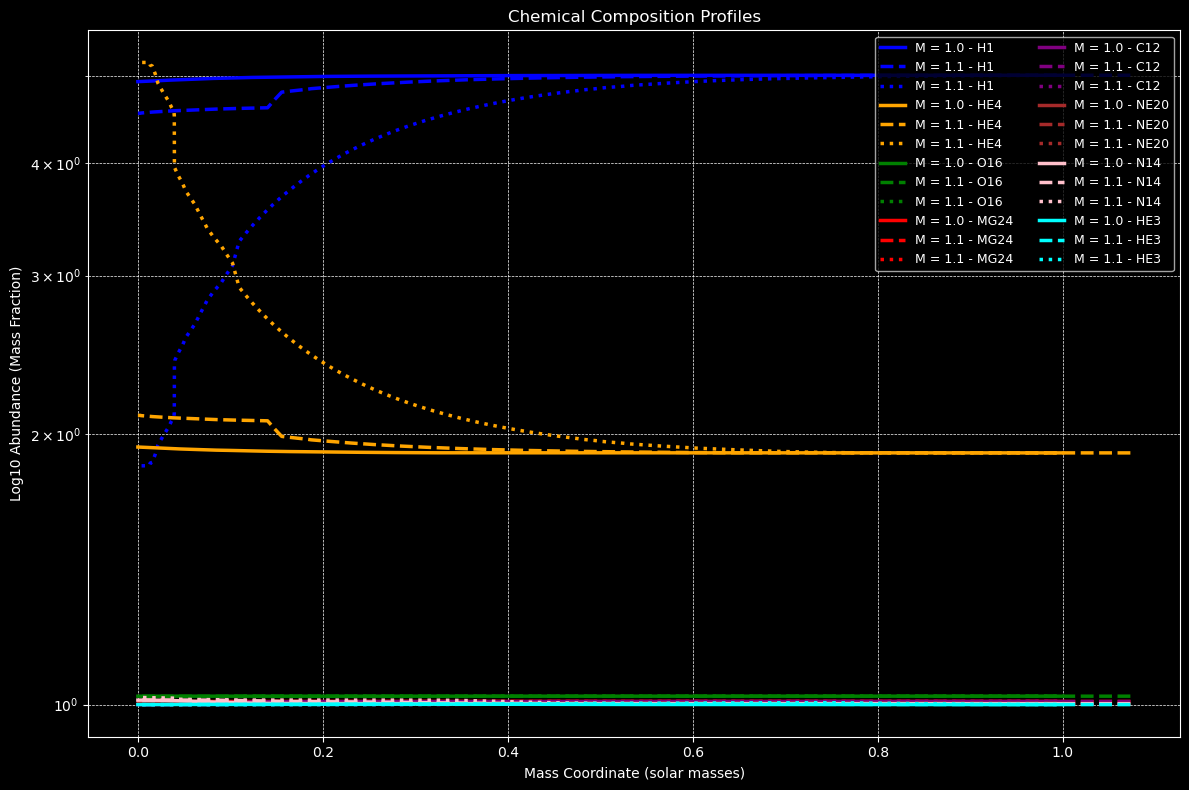

In [36]:
'''
NOTES FOR LATER

Look at notes to explain all of the relations between the different chemicals and why there are reflections of some elements
'''
def plot_all_chemicals(a1, a2, a3, label1, label2, label3, output_image):
    # List of chemicals to plot
    chemicals = ['h1', 'he4', 'o16', 'mg24', 'c12', 'ne20', 'n14', 'he3']
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan']
    
    plt.figure(figsize=(12, 8))
    
    for i, chem in enumerate(chemicals):
        plt.style.use('dark_background')
        # for the sake of our eyes
        plt.style.use('dark_background')
        # plot for dataset 1
        plt.semilogy(a1.data('mass'), 10**a1.data(chem), label=f'{label1} - {chem.upper()}', color=colors[i], linestyle='solid', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a2.data('mass'), 10**a2.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dashed', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a3.data('mass'), 10**a3.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dotted', linewidth=2.5)
    
    # Add labels, legend, and title
    plt.xlabel("Mass Coordinate (solar masses)")
    plt.ylabel("Log10 Abundance (Mass Fraction)")
    plt.title("Chemical Composition Profiles")
    plt.legend(ncol=2, fontsize=9, loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # plt.ylim(0.98, 1.03)
    
    # save and display the plot
    plt.tight_layout()
    plt.savefig(output_image)
    plt.show()

output_image = "chemical_compositions_all_new.png"
plot_all_chemicals(a1, a2, a3, label1="M = 1.0", label2="M = 1.1", label3="M = 1.2", output_image=output_image)



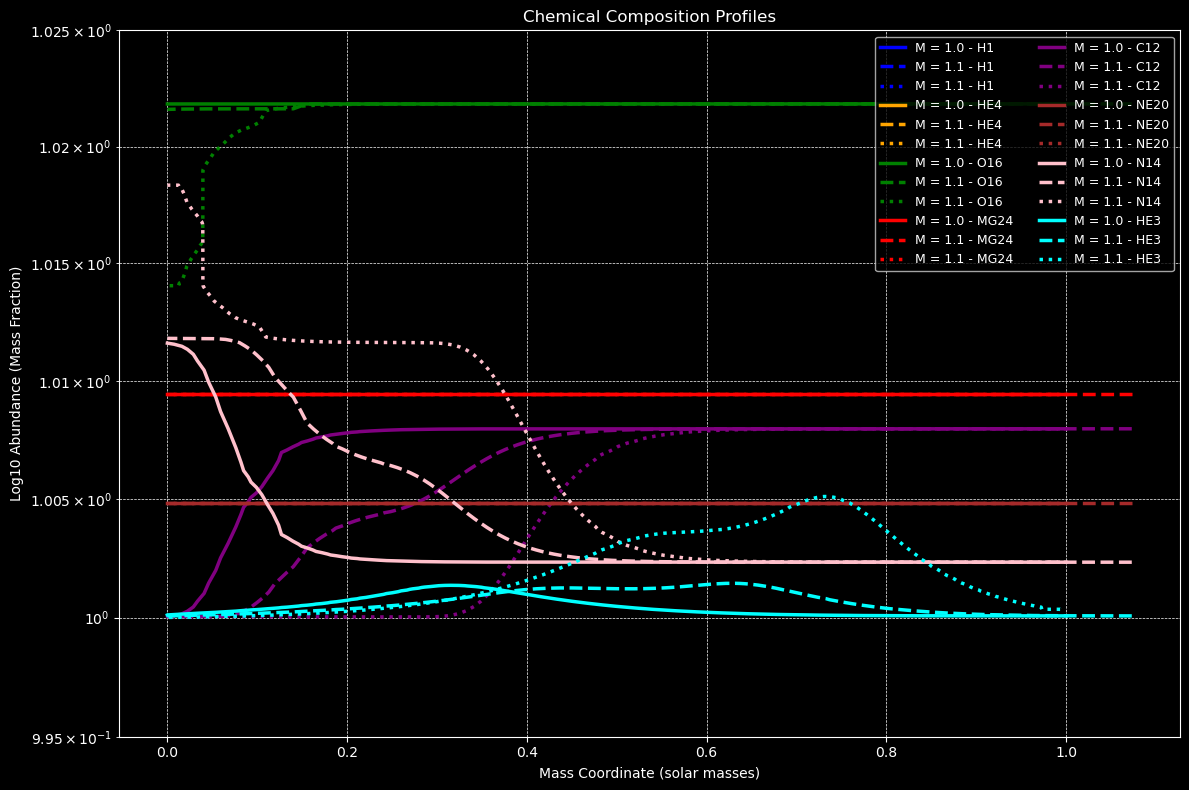

In [37]:
   def plot_all_chemicals(a1, a2, a3, label1, label2, label3, output_image):
    # List of chemicals to plot
    chemicals = ['h1', 'he4', 'o16', 'mg24', 'c12', 'ne20', 'n14', 'he3']
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan']
    
    plt.figure(figsize=(12, 8))
    
    for i, chem in enumerate(chemicals):
        # for the sake of our eyes
        plt.style.use('dark_background')
        # plot for dataset 1
        plt.semilogy(a1.data('mass'), 10**a1.data(chem), label=f'{label1} - {chem.upper()}', color=colors[i], linestyle='solid', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a2.data('mass'), 10**a2.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dashed', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a3.data('mass'), 10**a3.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dotted', linewidth=2.5)
        
    # add labels, legend, and title
    plt.xlabel("Mass Coordinate (solar masses)")
    plt.ylabel("Log10 Abundance (Mass Fraction)")
    plt.title("Chemical Composition Profiles")
    plt.legend(ncol=2, fontsize=9, loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.ylim(0.995, 1.025)
    
    # Save and display the plot
    plt.tight_layout()
    plt.savefig(output_image)
    plt.show()

output_image = "chemical_compositions_all_new.png"
plot_all_chemicals(a1, a2, a3, label1="M = 1.0", label2="M = 1.1", label3="M = 1.2", output_image=output_image)

In [58]:
import time

symbols = ["-", "\\", "|", "/"]

for i in range(200):
    print(symbols[i % 4], end="\r")
    time.sleep(0.1)